In [27]:
# Importing required libraries
import numpy as np
import pandas as pd
#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
#Oversampling
from imblearn.over_sampling import SMOTE
#Data splitting
from sklearn.model_selection import train_test_split
#Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

# Importing Processed Data

In [3]:
# loading out dataset from previous notebook
urldata = pd.read_csv("Url_Processed.csv")

# droping "Unnamed: 0" as its unncessary feature
urldata.drop("Unnamed: 0",axis=1,inplace=True)

urldata.head(10)

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,2,0,1,1,1,0,20,0,1,1
5,https://www.reddit.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,-1
6,https://www.yahoo.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
7,https://www.google.co.in,benign,0,24,16,0,0,0,0,0,...,3,0,1,1,1,0,18,0,1,1
8,https://www.qq.com,benign,0,18,10,0,0,0,0,0,...,2,0,1,1,1,0,13,0,1,1
9,https://www.amazon.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1


In [5]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              450176 non-null  object
 1   label            450176 non-null  object
 2   result           450176 non-null  int64 
 3   url_length       450176 non-null  int64 
 4   hostname_length  450176 non-null  int64 
 5   path_length      450176 non-null  int64 
 6   fd_length        450176 non-null  int64 
 7   count-           450176 non-null  int64 
 8   count@           450176 non-null  int64 
 9   count?           450176 non-null  int64 
 10  count%           450176 non-null  int64 
 11  count.           450176 non-null  int64 
 12  count=           450176 non-null  int64 
 13  count-http       450176 non-null  int64 
 14  count-https      450176 non-null  int64 
 15  count-www        450176 non-null  int64 
 16  count-digits     450176 non-null  int64 
 17  count-lett

# EDA

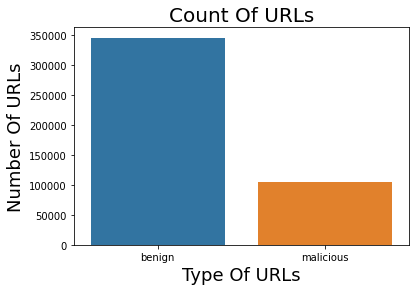

In [7]:
#Plot of benign and malicious URLs
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.show()

<AxesSubplot: >

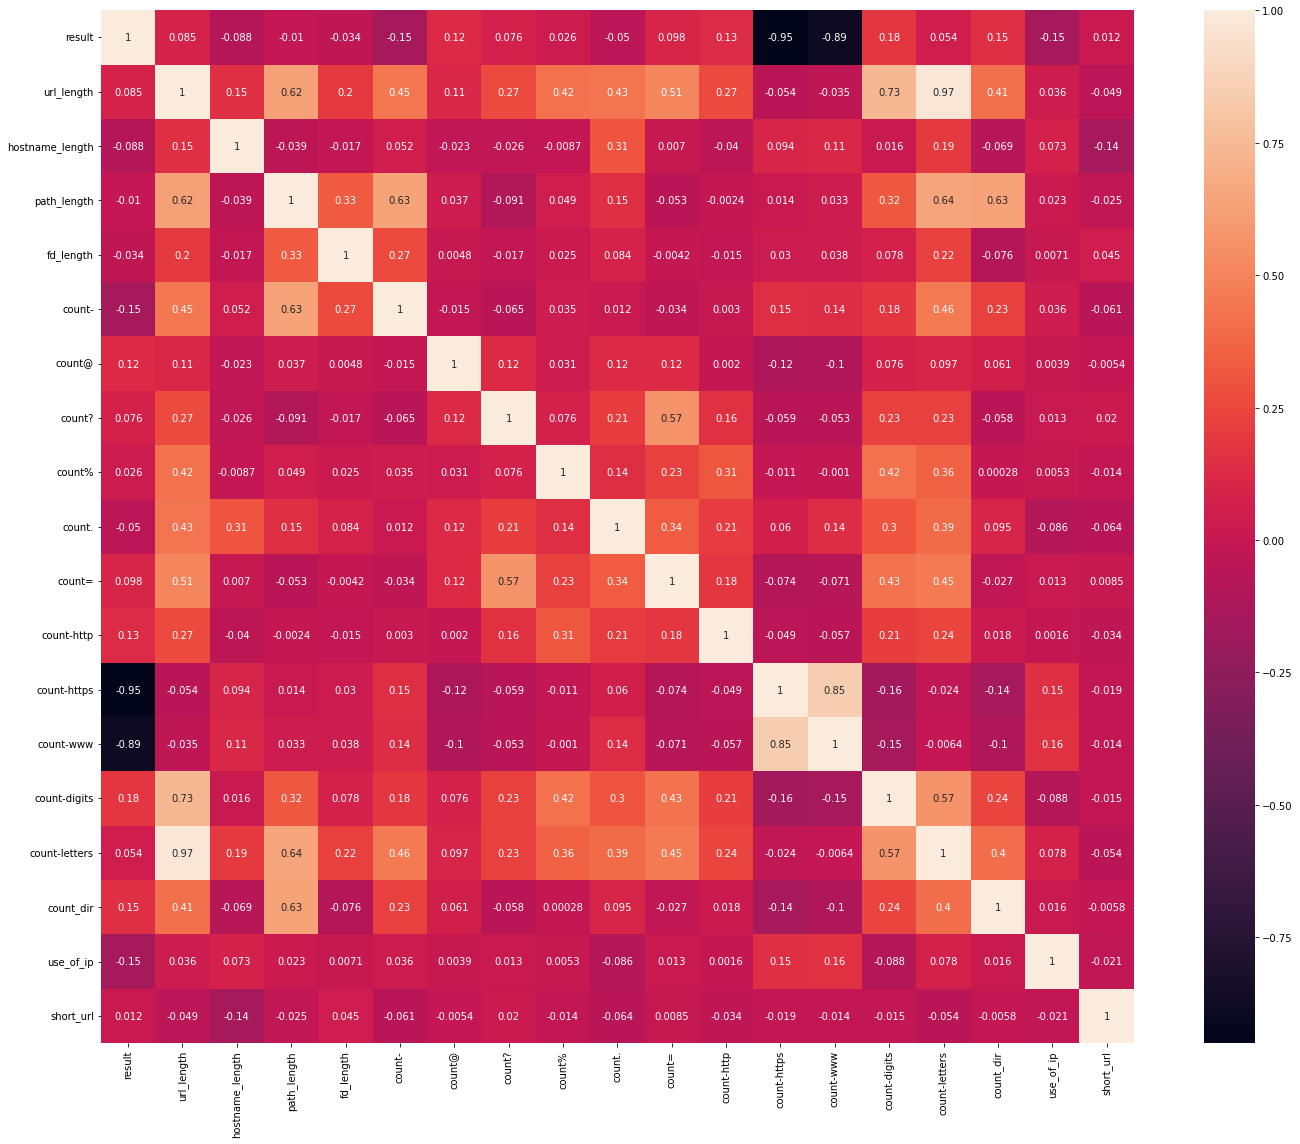

In [8]:
#Correlation Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

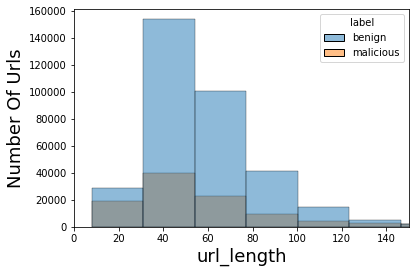

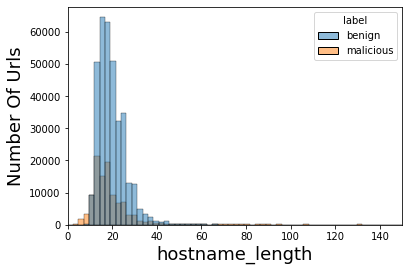

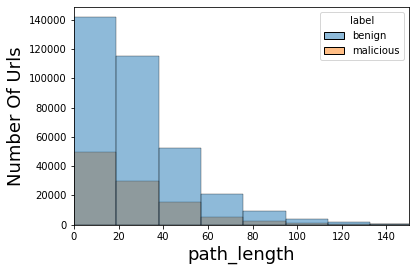

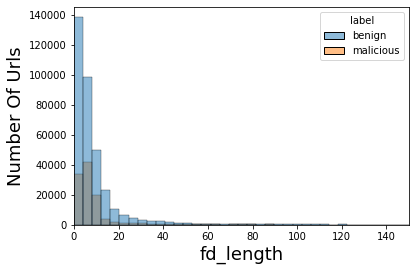

In [9]:
# plotting distrubutions
features = list(urldata.columns) # list of feature names
features.remove("url")
features.remove("result")

hist_features = ["url_length","hostname_length","path_length","fd_length"]

for i in hist_features:
   sns.histplot(data=urldata,x=i,bins=100,hue='label')
   plt.xlabel(i,fontsize=18)
   plt.ylabel("Number Of Urls",fontsize=18)
   plt.xlim(0,150)
   plt.show()

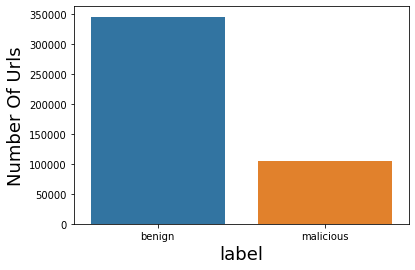

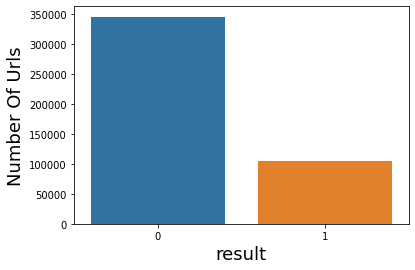

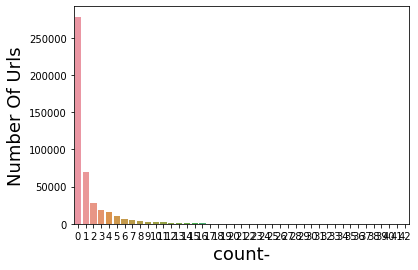

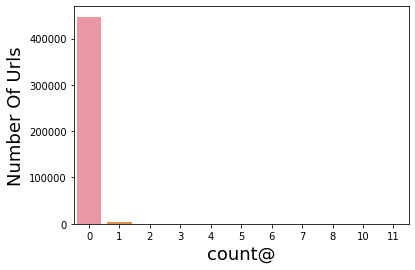

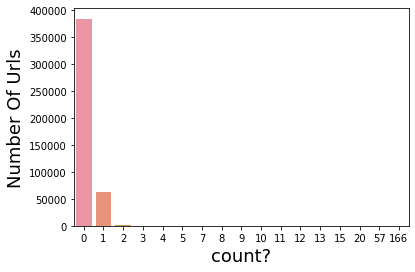

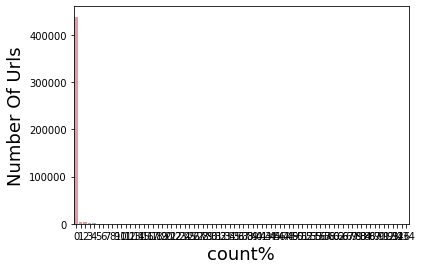

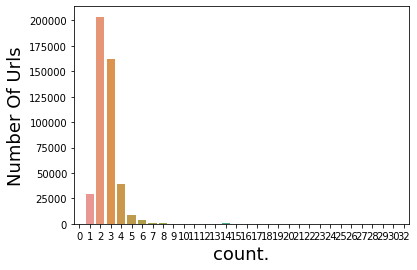

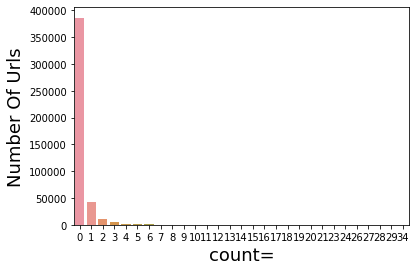

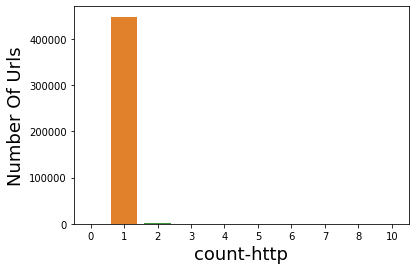

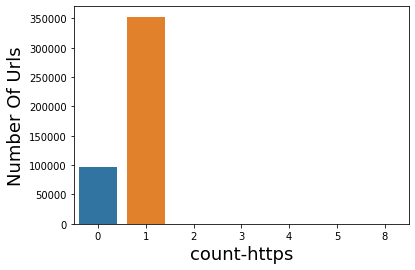

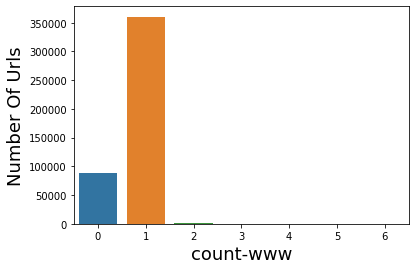

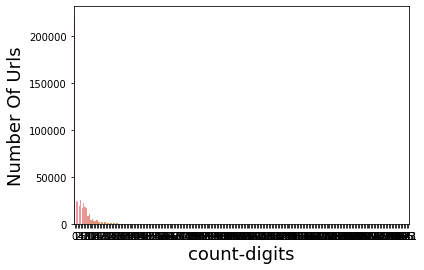

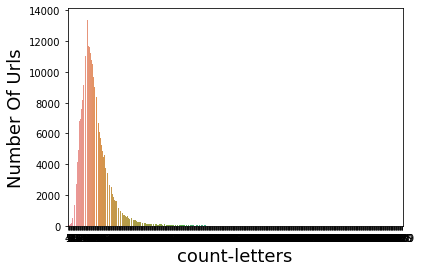

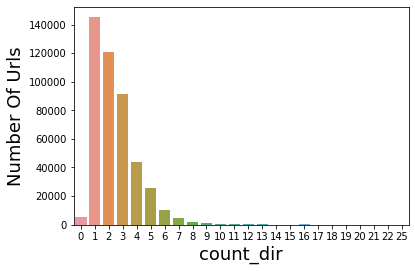

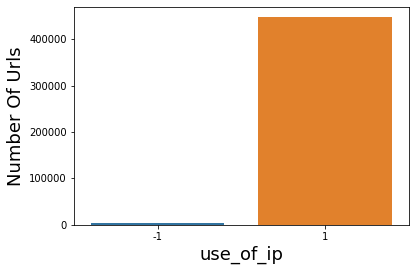

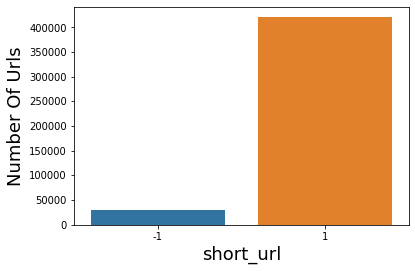

In [10]:
# plotting distrubutions

features = list(urldata.columns) # list of feature names
features.remove("url")


for i in features:
   
   if i in hist_features:
     continue
   
   sns.countplot(x=i,data=urldata)
   plt.xlabel(i,fontsize=18)
   plt.ylabel("Number Of Urls",fontsize=18)
   plt.show()

## Conclusion: Data is imbalanced, we need to balance it when training model

# Training model

## Data Splitting
80:20 splitting for train:test data

In [11]:
# remove uneccessary columns
urldata.drop(["url","label"],axis=1,inplace=True)

urldata.head()

,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,0,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1,1
1,0,23,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0,1,1
2,0,24,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0,1,1
3,0,21,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0,1,1
4,0,25,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0,1,1


In [12]:
# NOTE : Not taking 'url_length' and 'short_url'

#Independent Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Dependent Variable
y = urldata['result']

In [20]:
x_sample, y_sample = SMOTE().fit_resample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

In [25]:
#We now have equal benign and malicious 
y_sample.value_counts()

0    345738
1    345738
dtype: int64

In [28]:
# Data splitting
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (553180, 16)
Shape of x_valid:  (138296, 16)
Shape of y_train:  (553180, 1)
Shape of y_valid:  (138296, 1)


In [29]:
x_train

,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip
108676,20,1,0,0,0,0,0,2,0,1,1,1,0,23,1,1
385040,24,30,7,3,0,0,0,1,0,1,0,0,0,51,3,1
416340,7,8,7,0,0,0,0,1,0,1,0,0,2,15,1,1
42744,16,10,8,0,0,0,0,2,0,1,1,1,0,27,2,1
506735,25,40,9,1,0,0,0,2,0,1,0,0,4,59,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202512,18,60,4,8,0,0,0,2,0,1,1,1,4,66,3,1
145222,17,38,13,3,0,0,0,2,0,1,1,1,0,52,3,1
555605,18,1,0,0,0,0,0,2,0,1,0,0,1,19,1,1
339799,18,19,7,3,0,1,0,3,3,1,1,2,21,58,2,1


# MLP Deep Learning Model

In [30]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (16, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# compiling model
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

In [44]:
# custom callback to stop the training when certain metric value is reached

# stop training when validation loss reach 0.1
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.0001):
            print("\nReached 0.0001 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

In [45]:
# start training the model 
history = model.fit(x_train, y_train, epochs=10,batch_size=256, callbacks=[callback],validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
2161/2161 [==============================] - 2s 794us/step - loss: 0.0166 - acc: 0.9964 - val_loss: 0.0152 - val_acc: 0.9966
Epoch 2/10
2161/2161 [==============================] - 2s 793us/step - loss: 0.0160 - acc: 0.9965 - val_loss: 0.0151 - val_acc: 0.9967
Epoch 3/10
2161/2161 [==============================] - 2s 788us/step - loss: 0.0153 - acc: 0.9967 - val_loss: 0.0143 - val_acc: 0.9969
Epoch 4/10
2161/2161 [==============================] - 2s 792us/step - loss: 0.0150 - acc: 0.9968 - val_loss: 0.0175 - val_acc: 0.9963
Epoch 5/10
2161/2161 [==============================] - 2s 786us/step - loss: 0.0147 - acc: 0.9969 - val_loss: 0.0140 - val_acc: 0.9970
Epoch 6/10
2161/2161 [==============================] - 2s 811us/step - loss: 0.0145 - acc: 0.9969 - val_loss: 0.0148 - val_acc: 0.9969
Epoch 7/10
2161/2161 [==============================] - 2s 828us/step - loss: 0.0143 - acc: 0.9970 - val_loss: 0.0142 - val_acc: 0.9971
Epoch 8/10
2161/2161 [==========================

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


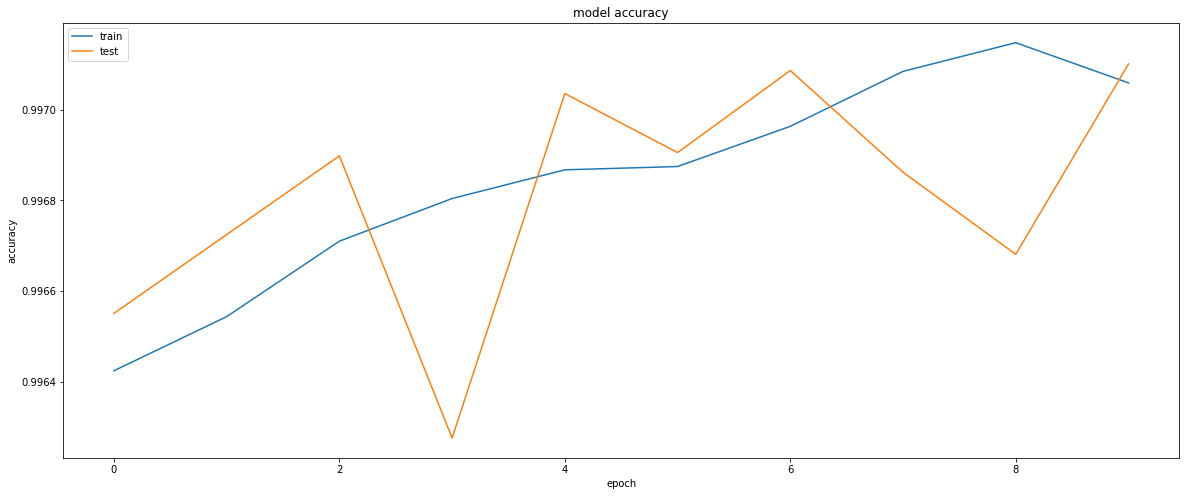

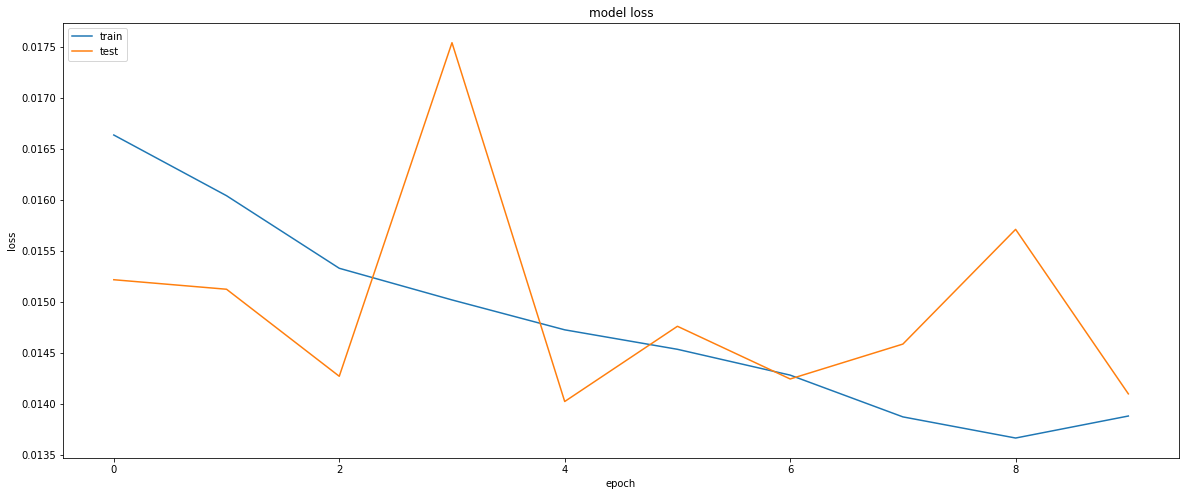

In [47]:
# DISPLAYING MODEL TRAINING HISTORY

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(20,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
# Evaluate the model on test dataset
loss, acc = model.evaluate(x_test,y_test,verbose=1)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))
     

4322/4322 [==============================] - 2s 535us/step - loss: 0.0141 - acc: 0.9971
Test loss: 0.014099587686359882
Test Accuracy: 0.9971004128456116


In [49]:
# Save Model Weights and Architecture Together
model.save("model.h5")

C:\Users\Kabir\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
